## Simulate and visualize fields with varying spatial coherence


In [ ]:
import torch
import torchoptics
from torchoptics import CoherenceField
from torchoptics.profiles import gaussian_schell_model as gsm

In [ ]:
# Set simulation properties
shape = 50  # Number of grid points in each dimension
spacing = 10e-6  # Spacing between grid points (m)
wavelength = 700e-9  # Field wavelength (m)
waist_radius = 50e-6  # Waist radius of the Gaussian beam (m)
high_coherence_width = 1e-3  # Coherence width of the field with high coherence (m)
low_coherence_width = 10e-6  # Coherence width of the field with low coherence (m)

# Determine device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Configure torchoptics default properties
torchoptics.set_default_spacing(spacing)
torchoptics.set_default_wavelength(wavelength)

In [ ]:
high_coherence_field = CoherenceField(gsm(shape, waist_radius, high_coherence_width)).to(device)
low_coherence_field = CoherenceField(gsm(shape, waist_radius, low_coherence_width)).to(device)

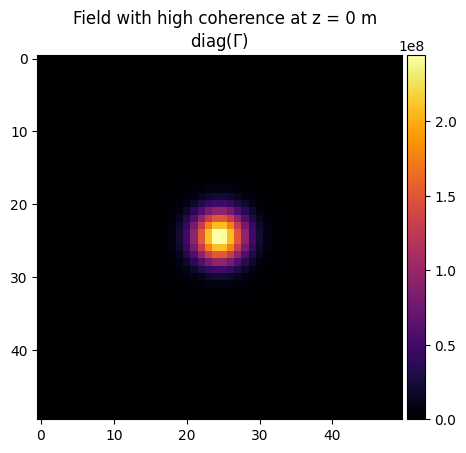

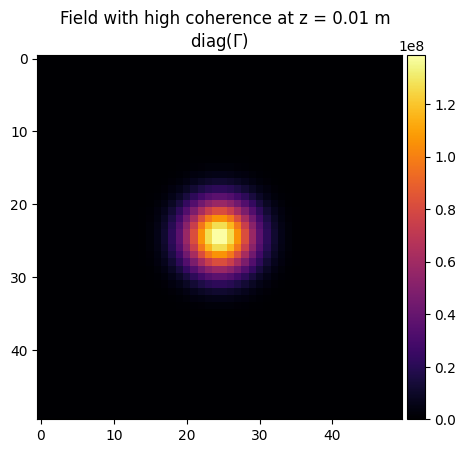

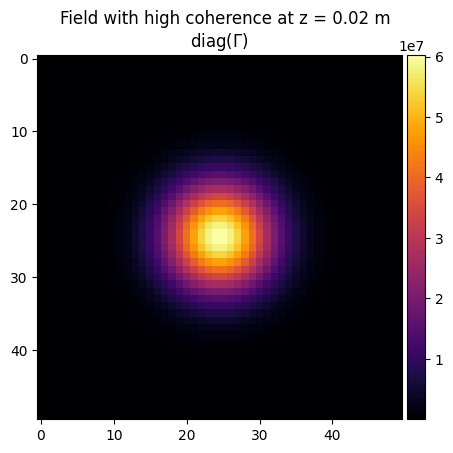

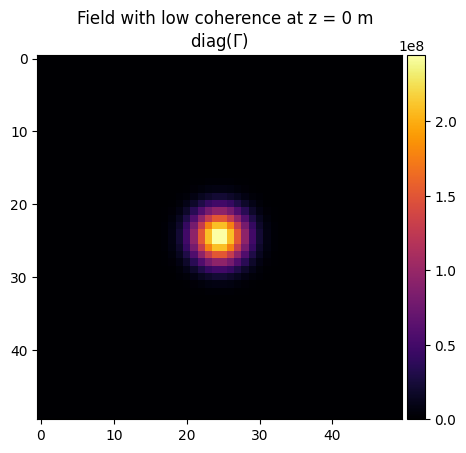

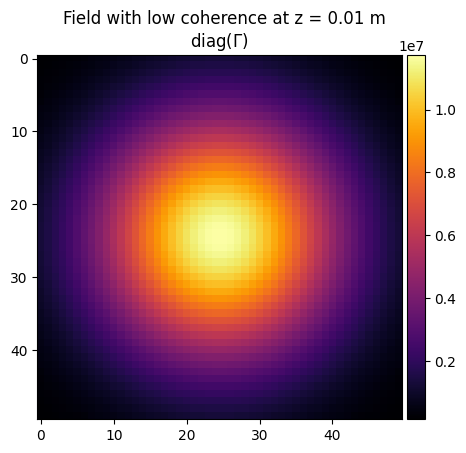

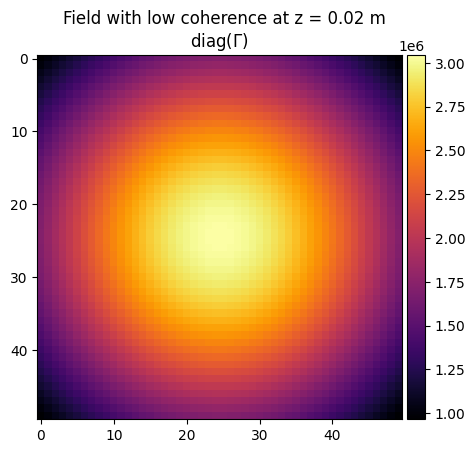

In [ ]:
propagation_distances = [0, 0.01, 0.02]

for z in propagation_distances:
    high_coherence_field.propagate_to_z(z).visualize(title=f"Field with high coherence at z = {z} m")

for z in propagation_distances:
    low_coherence_field.propagate_to_z(z).visualize(title=f"Field with low coherence at z = {z} m")